In [1]:
import pandas as pd
import numpy as np

In [2]:
## Load the dataset into DataFrame
df = pd.read_csv("coffee_shop_revenue.csv")

In [3]:
df.head(2)

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
0,152,6.74,14,4,106.62,97,1547.81
1,485,4.50,12,8,57.83,744,2084.68


In [4]:
df.shape

(2000, 7)

In [5]:
## Checking Null Values
df.isnull().sum()

Number_of_Customers_Per_Day    0
Average_Order_Value            0
Operating_Hours_Per_Day        0
Number_of_Employees            0
Marketing_Spend_Per_Day        0
Location_Foot_Traffic          0
Daily_Revenue                  0
dtype: int64

In [6]:
import matplotlib.pyplot as plt


C:\Users\Kiran\Anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


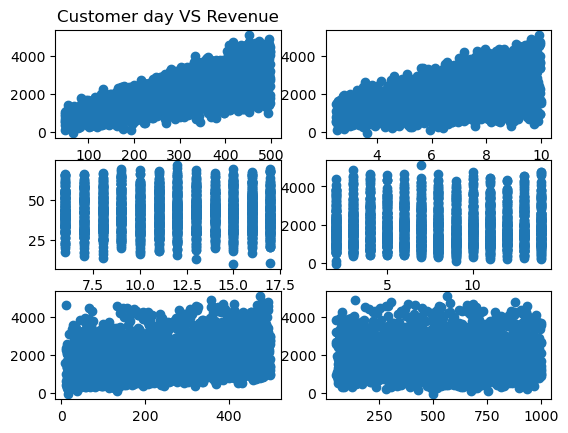

In [7]:

figure, axis = plt.subplots(3, 2) ## used to plot Multiple Graphs
axis[0, 0].scatter(df["Number_of_Customers_Per_Day"],df["Daily_Revenue"])
axis[0, 0].set_title("Customer day VS Revenue")
axis[0, 1].scatter(df["Average_Order_Value"],df["Daily_Revenue"])
axis[1, 0].scatter(df["Operating_Hours_Per_Day"],np.sqrt(df["Daily_Revenue"]))
axis[1, 1].scatter(df["Number_of_Employees"],df["Daily_Revenue"])
axis[2, 0].scatter(df["Marketing_Spend_Per_Day"],df["Daily_Revenue"])
axis[2, 1].scatter(df["Location_Foot_Traffic"],df["Daily_Revenue"])
plt.show()

In [8]:
##indedependent vairables shuould be independent of each other , So check COV if any X features are correlated
df.corr()

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
Number_of_Customers_Per_Day,1.000000,-0.014647,0.000122,0.000346,0.027184,-0.000880,0.736461
Average_Order_Value,-0.014647,1.000000,-0.017125,0.011484,0.018782,0.018151,0.535694
Operating_Hours_Per_Day,0.000122,-0.017125,1.000000,-0.030451,0.019247,0.014422,-0.005323
Number_of_Employees,0.000346,0.011484,-0.030451,1.000000,0.026535,-0.041881,0.003295
Marketing_Spend_Per_Day,0.027184,0.018782,0.019247,0.026535,1.000000,-0.012562,0.254812
Location_Foot_Traffic,-0.000880,0.018151,0.014422,-0.041881,-0.012562,1.000000,0.013469
Daily_Revenue,0.736461,0.535694,-0.005323,0.003295,0.254812,0.013469,1.000000


## So now we have seen from above correlation there is no features which are correlated .  So we are good from First assumption of Linear Regression . But we
## Have also seen some features are not correlated with target Variable means they are not giving any information to predict target Variable(DAILY_reveue). So we will drop those features

In [9]:
## Drop features

df.drop(columns=["Operating_Hours_Per_Day","Number_of_Employees","Location_Foot_Traffic"],inplace=True)

In [10]:
df.shape

(2000, 4)

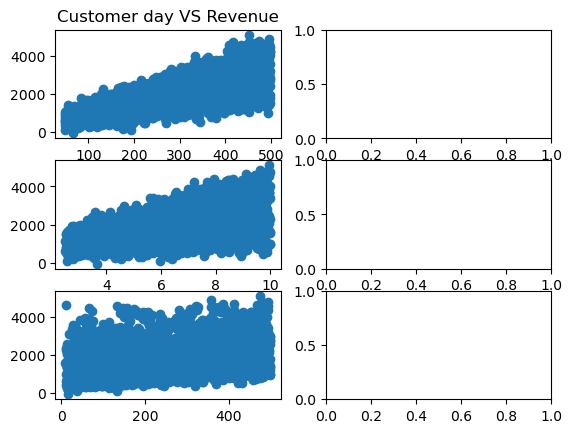

In [11]:
figure, axis = plt.subplots(3, 2)
axis[0, 0].scatter(df["Number_of_Customers_Per_Day"],df["Daily_Revenue"])
axis[0, 0].set_title("Customer day VS Revenue")
axis[1, 0].scatter(df["Average_Order_Value"],df["Daily_Revenue"])
axis[2, 0].scatter(df["Marketing_Spend_Per_Day"],df["Daily_Revenue"])
plt.show()

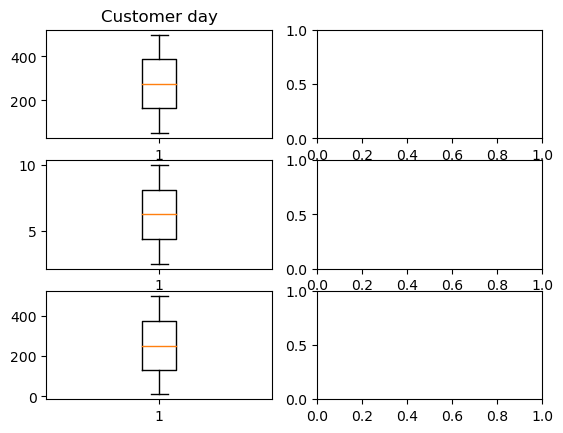

In [12]:
## Check outlier if Any
figure, axis = plt.subplots(3, 2)
axis[0, 0].boxplot(df["Number_of_Customers_Per_Day"])
axis[0, 0].set_title("Customer day")
axis[1, 0].boxplot(df["Average_Order_Value"])
axis[2, 0].boxplot(df["Marketing_Spend_Per_Day"])
plt.show()

In [13]:
## So we can see no value is beyong MAX/MIN so no outlier in this dataset

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [15]:
X = df.drop(columns=["Daily_Revenue"])
Y =  df["Daily_Revenue"]

In [16]:
## Spliting The data into test and train
X_train,X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=10)

In [17]:
X_train.shape

(1400, 3)

In [18]:
X_test.shape

(600, 3)

In [19]:
X_train.head(2)

,Number_of_Customers_Per_Day,Average_Order_Value,Marketing_Spend_Per_Day
1443,251,3.04,128.46
1126,74,6.34,455.12


In [20]:
## Scalaing of X features
sc = StandardScaler()
X_train_scaled= sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [21]:
import joblib 
with open("Standard_Scaler.joblib","wb") as file:
    joblib.dump(sc,file)

In [22]:
X_train_scaled[1]

array([-1.55262027,  0.0241881 ,  1.41229287])

In [23]:
### Import Linear Regression
lm = LinearRegression()

In [24]:
## training Model on training dataset
lm.fit(X_train_scaled,Y_train)

LinearRegression()

In [25]:
## prediction on test using above trained model
y_pred = lm.predict(X_test_scaled)

In [26]:
#from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_squared_error

In [27]:
## Calculate MSE
error = mean_squared_error(Y_test,y_pred)

In [28]:
error

104109.43671666678

In [29]:
## Manual Calculation for MSE
np.sum(( Y_test - y_pred )**2) / 600

104109.43671666678

In [30]:
## Saving a Model as joblib File
import joblib 
with open("LinearRegression.joblib","wb") as file:
    joblib.dump(lm,file)

In [31]:
## Load the trained Model for Prediction
import_lm = joblib.load("LinearRegression.joblib")

In [32]:
## Calling trained model on new Data for Revenue Prediction
print(f"Daily Reveue predicted by our Linear Model for given data is :{import_lm.predict([[152,6.2,100.5]])[0]}")

Daily Reveue predicted by our Linear Model for given data is :137703.5779172414


## below is from 9-March Lecture

# wE NEED TO read by calling 'b' because this is binary model file. Below is a example where it will give error if u call with b

In [33]:
with open("LinearRegression.joblib", "r") as f:
    model = joblib.load(f)

UnicodeDecodeError: 'charmap' codec can't decode byte 0x81 in position 62: character maps to <undefined>

In [34]:
from data_preprocessing  import preprocessing

In [42]:
var1= 1
var2= 2
var3=200
data = pd.DataFrame([[var1,var2,var3]], columns=['Number_of_Customers_Per_Day','Average_Order_Value','Marketing_Spend_Per_Day'])

In [43]:
data

,Number_of_Customers_Per_Day,Average_Order_Value,Marketing_Spend_Per_Day
0,1,2,200


In [44]:
scaled_x = preprocessing(data)

In [45]:
scaled_x

array([[-2.11460201, -1.97590572, -0.37924655]])

In [46]:
predictions = import_lm.predict(scaled_x)

In [47]:
 predicted_value = predictions[0] if isinstance(predictions, np.ndarray) else predictions

In [48]:
predicted_value

-734.3529979006892